In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_8_4.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:200000, :]
x_test = input_data[200000:205000, :]


(405000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_8_4.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:200000, :]
y_test = output_data[200000:205000, :]
print(output_data.shape)

(405000, 12)
(405000, 12)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(250, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(250, activation = 'relu'),
    tf.keras.layers.Dense(250, activation = 'relu'),
    tf.keras.layers.Dense(250, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.0035)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 200000 samples, validate on 5000 samples
Epoch 1/100
200000/200000 - 7s - loss: 0.1963 - accuracy: 0.9127 - val_loss: 0.1555 - val_accuracy: 0.9221
Epoch 2/100
200000/200000 - 8s - loss: 0.1076 - accuracy: 0.9485 - val_loss: 0.0806 - val_accuracy: 0.9602
Epoch 3/100
200000/200000 - 8s - loss: 0.0657 - accuracy: 0.9668 - val_loss: 0.0567 - val_accuracy: 0.9713
Epoch 4/100
200000/200000 - 8s - loss: 0.0534 - accuracy: 0.9715 - val_loss: 0.0498 - val_accuracy: 0.9728
Epoch 5/100
200000/200000 - 7s - loss: 0.0485 - accuracy: 0.9731 - val_loss: 0.0460 - val_accuracy: 0.9732
Epoch 6/100
200000/200000 - 7s - loss: 0.0462 - accuracy: 0.9738 - val_loss: 0.0461 - val_accuracy: 0.9739
Epoch 7/100
200000/200000 - 7s - loss: 0.0453 - accuracy: 0.9739 - val_loss: 0.0450 - val_accuracy: 0.9736
Epoch 8/100
200000/200000 - 8s - loss: 0.0445 - accuracy: 0.9742 - val_loss: 0.0449 - val_accuracy: 0.9740
Epoch 9/100
200000/200000 - 9s - loss: 0.0438 - accuracy: 0.9746 - val_loss: 0.0456 - val_accu

Epoch 77/100
200000/200000 - 11s - loss: 0.0307 - accuracy: 0.9844 - val_loss: 0.0572 - val_accuracy: 0.9725
Epoch 78/100
200000/200000 - 11s - loss: 0.0315 - accuracy: 0.9840 - val_loss: 0.0587 - val_accuracy: 0.9721
Epoch 79/100
200000/200000 - 10s - loss: 0.0309 - accuracy: 0.9843 - val_loss: 0.0583 - val_accuracy: 0.9725
Epoch 80/100
200000/200000 - 9s - loss: 0.0298 - accuracy: 0.9850 - val_loss: 0.0613 - val_accuracy: 0.9724
Epoch 81/100
200000/200000 - 10s - loss: 0.0296 - accuracy: 0.9851 - val_loss: 0.0612 - val_accuracy: 0.9715
Epoch 82/100
200000/200000 - 10s - loss: 0.0302 - accuracy: 0.9850 - val_loss: 0.0614 - val_accuracy: 0.9724
Epoch 83/100
200000/200000 - 9s - loss: 0.0288 - accuracy: 0.9856 - val_loss: 0.0635 - val_accuracy: 0.9717
Epoch 84/100
200000/200000 - 10s - loss: 0.0306 - accuracy: 0.9848 - val_loss: 0.0632 - val_accuracy: 0.9721
Epoch 85/100
200000/200000 - 10s - loss: 0.0286 - accuracy: 0.9858 - val_loss: 0.0677 - val_accuracy: 0.9716
Epoch 86/100
200000/2

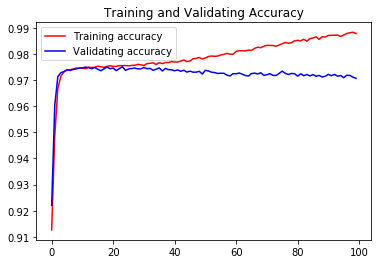

In [7]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [8]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_8_4_model.h5')